In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cowsay
import math

In [4]:
def ab_sr (x, y):
    sum_xy = 0
    for i in range(len(x)):
        sum_xy += x[i]*y[i]
    return sum_xy/len(x)
g = 9.80665
R = 8.31446262
K = 1.380649*10**-23
def MNK_direct (x, y, pl = None, lab = None, color = None):
    sum_xy = ab_sr(x, y)
    sum_xx = ab_sr(x, x)
    sum_yy = ab_sr(y, y)
    k = sum_xy/sum_xx
    qk = (1/(len(x)**0.5))*(((sum_yy/sum_xx)-k**2)**0.5)
    if pl:
        pl.scatter(x, y, label = lab, marker='o', c = color)
        pl.plot ([x[0], x[len(x)-1]], [fx(x[0], k, 0), fx(x[len(x)-1], k, 0)], c = color)
    return [k, qk]
def fx(x, k, b):
    return x*k+b
def MNK (x, y, pl = None, lab = None, color = None):
    '''
    Функция для нахождения коэфициентов мнк и их погрешностей
    y = kx + b
    [k, b, полн_погр_k, отн_погр_b, среднкв_погр_k, отн_погр_k]
    '''
    k = (ab_sr(x, y)-sum(x)/len(x)*sum(y)/len(y))/(ab_sr(x, x) - (sum(x)/len(x))**2)
    b = sum(y)/len(y) - k*sum(x)/len(x)
    qk = (1/len(x)**0.5)*((ab_sr(y, y)-(sum(y)/len(y))**2)/((ab_sr(x, x)-(sum(x)/len(x))**2))-k**2)**0.5
    qb = qk * (ab_sr(x, x)-(sum(x)/len(x))**2)**0.5
    dk_s = 0
    if (ab_sr(x, x) - (sum(x)/len(x))**2) > 0 and (len(x)-2)>0:
        dk_s = math.sqrt(((ab_sr(y, y) - (sum(y)/len(y))**2)/(ab_sr(x, x) - (sum(x)/len(x))**2))/(len(x)-2)) 
    if pl:
        pl.scatter(x, y, label = lab, marker='o', c = color)
        pl.plot ([x[0], x[len(x)-1]], [fx(x[0], k, b), fx(x[len(x)-1], k, b)], c = color)
    return [k, b, math.sqrt(abs(dk_s)**2 + abs(qk)**2), abs(qb), abs(dk_s), abs(qk)]

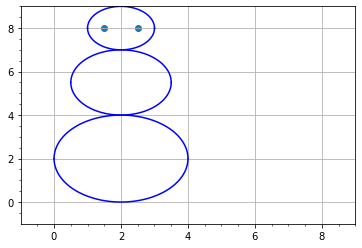

In [3]:
def add_rang(a, b, r):
    x = np.arange(a-r, a+r+0.0001, 0.0001)
    plt.plot(x, b+(r**2-(x-a)**2)**0.5, c = 'b')
    plt.plot(x, b-(r**2-(x-a)**2)**0.5, c = 'b')
add_rang(2, 2, 2)
add_rang(2, 5.5, 1.5)
add_rang(2, 8, 1)
plt.scatter([1.5, 2.5], [8, 8])
plt.minorticks_on()
plt.grid(which='major')
plt.ylim(-1, 9)
plt.xlim(-1, 9)
plt.show()

In [192]:
print('|', '\n|'.join([''.join([f'{j:2} *{i:2} = {i*j:2}|' for j in range(1, 10)]) for i in range(1, 50)]), sep = '')

| 1 * 1 =  1| 2 * 1 =  2| 3 * 1 =  3| 4 * 1 =  4| 5 * 1 =  5| 6 * 1 =  6| 7 * 1 =  7| 8 * 1 =  8| 9 * 1 =  9|
| 1 * 2 =  2| 2 * 2 =  4| 3 * 2 =  6| 4 * 2 =  8| 5 * 2 = 10| 6 * 2 = 12| 7 * 2 = 14| 8 * 2 = 16| 9 * 2 = 18|
| 1 * 3 =  3| 2 * 3 =  6| 3 * 3 =  9| 4 * 3 = 12| 5 * 3 = 15| 6 * 3 = 18| 7 * 3 = 21| 8 * 3 = 24| 9 * 3 = 27|
| 1 * 4 =  4| 2 * 4 =  8| 3 * 4 = 12| 4 * 4 = 16| 5 * 4 = 20| 6 * 4 = 24| 7 * 4 = 28| 8 * 4 = 32| 9 * 4 = 36|
| 1 * 5 =  5| 2 * 5 = 10| 3 * 5 = 15| 4 * 5 = 20| 5 * 5 = 25| 6 * 5 = 30| 7 * 5 = 35| 8 * 5 = 40| 9 * 5 = 45|
| 1 * 6 =  6| 2 * 6 = 12| 3 * 6 = 18| 4 * 6 = 24| 5 * 6 = 30| 6 * 6 = 36| 7 * 6 = 42| 8 * 6 = 48| 9 * 6 = 54|
| 1 * 7 =  7| 2 * 7 = 14| 3 * 7 = 21| 4 * 7 = 28| 5 * 7 = 35| 6 * 7 = 42| 7 * 7 = 49| 8 * 7 = 56| 9 * 7 = 63|
| 1 * 8 =  8| 2 * 8 = 16| 3 * 8 = 24| 4 * 8 = 32| 5 * 8 = 40| 6 * 8 = 48| 7 * 8 = 56| 8 * 8 = 64| 9 * 8 = 72|
| 1 * 9 =  9| 2 * 9 = 18| 3 * 9 = 27| 4 * 9 = 36| 5 * 9 = 45| 6 * 9 = 54| 7 * 9 = 63| 8 * 9 = 72| 9 * 9 = 81|
| 1 *10 = 

# лабораторная работа 2.2.3

In [4]:
def f(a):
    return list(map(float, a.replace(",", '.').split()))
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lime']
t = {}
t['24'] = [f('13,30 13,09 13,00 13,03 12,90'), f('133,0 64,1 32,5 11,7 1,3')]
t['30'] = [f('13,40 13,30 13,30 13,23 13,20'), f('134,0 65,2 33,3 11,9 1,3')]
t['35'] = [f('13,60 13,47 13,40 13,37 13,30'), f('136,0 66,0 33,5 12,0 1,3')]
t['40'] = [f('13,85 13,63 13,58 13,53 13,50'), f('138,5 66,8 34,0 12,2 1,4')]
t['45'] = [f('14,0 13,8 13,8 13,7 13,7'), f('139,6 67,8 34,4 12,3 1,4')]
t['50'] = [f('14.1 14,0 13,9 13,9 13,9'), f('141 68,6 34,8 12,5 1,4')]
t['55'] = [f('14,5 14,2 14,1 14,1 14,1'), f('145,0 69,6 35,3 12,7 1,4')]
t['60'] = [f('14,6 14,4 14,3 14,2 14,2'), f('146,1 70,5 35,8 12,8 1,4')]

 343.01400813467495 -4432.615002271394 12.44507479981245 12.922548050956129
 663.7458194017942 -8769.386956572238 12.681474773834564 13.211965635392948
 469.6144949893471 -6256.223438716953 7.219258542906425 13.322040749314757
 394.43175921152425 -5320.791696942538 5.289808114872369 13.489764890076017
 442.50000000102676 -6055.400000014169 10.250233974702628 13.684519774011566
 611.3124999960204 -8482.262499944445 10.457903889371565 13.875493303342667
 321.3333333333302 -4510.133333333289 12.374566504707749 14.035684647302903
 346.39285714279396 -4913.953571427666 4.03005114157281 14.186070728941102


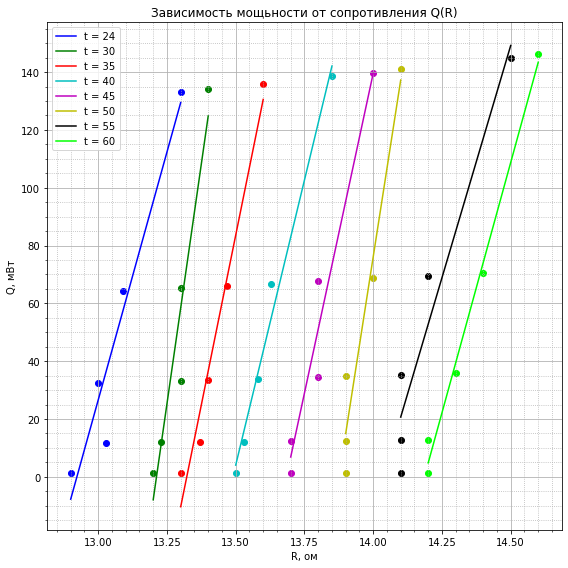

In [5]:
b = []
def f(x):
    a = MNK(x[0], x[1])
    print(f' {a[0]} {a[1]} {a[2]/a[0]*100} {-a[1]/a[0]}')
    b.append([a[0], a[1], a[2]/a[0]*100, -a[1]/a[0], a[2], a[3]])
    a = MNK(x[0], x[1])[0]*x[0][0]+MNK(x[0], x[1])[1]
    a2 = MNK(x[0], x[1])[0]*x[0][len(x[0])-1]+MNK(x[0], x[1])[1]
    return [a, a2]
key = list(t.keys())
plt.figure(figsize = (8, 8))
for i in range(len(key)):
    plt.scatter(t[key[i]][0], t[key[i]][1], c = color[i])
    plt.plot([t[key[i]][0][0], t[key[i]][0][4]], f(t[key[i]]), c = color[i], label='t = ' + key[i])
plt.title("Зависимость мощьности от сопротивления Q(R)")
plt.xlabel("R, ом")
plt.ylabel("Q, мВт")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

 0.034731786623801414 12.119251514233675 2.1247646482616775 -348.9383268849305


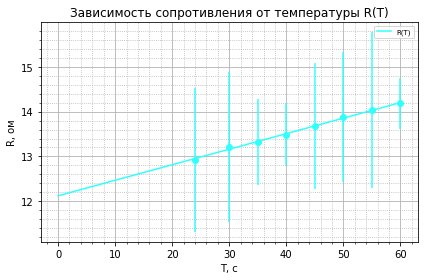

[0.034731786623801414,
 12.119251514233675,
 2.1247646482616775,
 -348.9383268849305,
 0.0007379687238922105,
 0.008597711735787054]

In [6]:
key_int = list(map(int, key))
R = [a[3] for a in b]
cf = MNK(key_int, R)
plt.errorbar(key_int, R, yerr = [a[3]*(((a[4]/a[0])**2 + (a[5]/a[1])**2)**0.5) for a in b], marker='o', linestyle='none', c = '#31fffe')
plt.plot([0, key_int[0], key_int[7]], [cf[1]]+f([key_int, R]), label='R(T)',c = '#31fffe')
plt.title("Зависимость сопротивления от температуры R(T)")
plt.xlabel("T, c")
plt.ylabel("R, ом")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize = 7)
plt.tight_layout()
plt.show()
b.pop()

In [7]:
k = []
err = []
l = 347
for i in range(8):
    g = b[i][0]*cf[0]*(1/(2*math.pi*l))*5.30
    err.append(g*((0.2/l)**2+(b[i][4]/b[i][0])**2+(b[i][5]/b[i][1])**2+(0.01/5)**2+(0.005/0.0275)**2)**0.5)
    k.append(g)
    print(f't = {key_int[i]}: k = {round(g, 4)}, \sigma_k = {round(g*((0.2/l)**2+(b[i][4]/b[i][0])**2+(b[i][5]/b[i][1])**2+(0.01/5)**2+(0.005/0.0275)**2)**0.5, 4)} \\\\')

t = 24: k = 0.029, \sigma_k = 0.0064 \\
t = 30: k = 0.056, \sigma_k = 0.0124 \\
t = 35: k = 0.0396, \sigma_k = 0.0078 \\
t = 40: k = 0.0333, \sigma_k = 0.0063 \\
t = 45: k = 0.0374, \sigma_k = 0.0078 \\
t = 50: k = 0.0516, \sigma_k = 0.0108 \\
t = 55: k = 0.0271, \sigma_k = 0.006 \\
t = 60: k = 0.0292, \sigma_k = 0.0054 \\


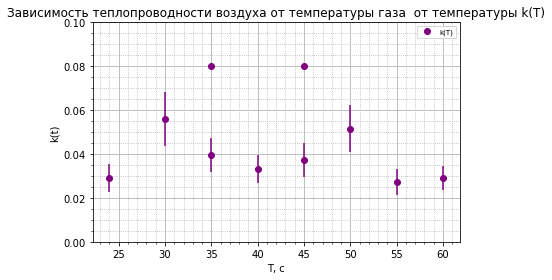

In [8]:
plt.errorbar(key_int + [35, 45], k + [0.08, 0.08], yerr = err + [0.001, 0.001], c = 'purple', label = 'k(T)', linestyle='none',  marker='o')
plt.title("Зависимость теплопроводности воздуха от температуры газа  от температуры k(T)")
plt.xlabel("T, c")
plt.ylabel("k(t)")
plt.minorticks_on()
plt.grid(which='major')
plt.ylim([0, 0.1])
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize = 7)
plt.tight_layout()
plt.show()

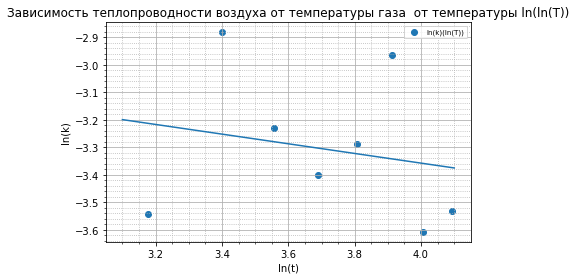

In [9]:
ln_k = [math.log(x) for x in k]
ln_t = [math.log(x) for x in key_int]
plt.scatter(ln_t, ln_k, label = 'ln(k)(ln(T))')
plt.plot([3.1, 4.1], [MNK(ln_t, ln_k)[0]*3.1+MNK(ln_t, ln_k)[1], MNK(ln_t, ln_k)[0]*4.1+MNK(ln_t, ln_k)[1]])
plt.title("Зависимость теплопроводности воздуха от температуры газа  от температуры ln(ln(T))")
plt.xlabel("ln(t)")
plt.ylabel("ln(k)")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize = 7)
plt.tight_layout()
plt.show()

# Лабораторная работа 2.2.6

In [25]:
t = {}
u0 = 0.00
t['20'] = {'p': [2, 2.5, 3, 3.5, 4],'u': [0.050, 0.070, 0.090, 0.105, 0.126], 'k': 40.2}
t['30'] = {'p': [2, 2.5, 3, 3.5, 4],'u': [0.052, 0.070, 0.084, 0.102, 0.122], 'k': 41.1}
t['50'] = {'p': [2, 2.5, 3, 3.5, 4],'u': [0.054, 0.068, 0.080, 0.096, 0.112], 'k': 42.9}

In [26]:
t['20']['u']

[0.05, 0.07, 0.09, 0.105, 0.126]

In [27]:
dt = {}
dt['20'] = [i*1000/t['20']['k'] for i in t['20']['u']]
dt['30'] = [i*1000/t['30']['k'] for i in t['30']['u']]
dt['50'] = [i*1000/t['50']['k'] for i in t['50']['u']]

In [37]:
d = '50'
p = 'p'
u = 'u'
for i in range(5):
    print (f'{t[d][p][i]} 0,05 {t[d][u][i]} 0,001 {round(dt[d][i], 2)} {round(dt[d][i]*0.001/t[d][u][i], 2)}'.replace('.', ','))

2 0,05 0,054 0,001 1,26 0,02
2,5 0,05 0,068 0,001 1,59 0,02
3 0,05 0,08 0,001 1,86 0,02
3,5 0,05 0,096 0,001 2,24 0,02
4 0,05 0,112 0,001 2,61 0,02


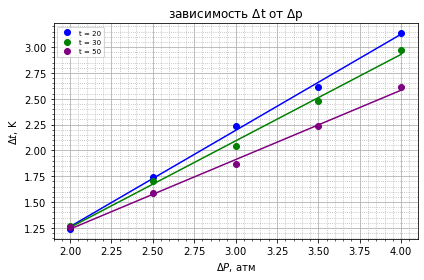

In [29]:
plt.errorbar(t['20']['p'], dt['20'],  label = 't = 20', linestyle='none',  marker='o', c = 'b')
plt.errorbar(t['30']['p'], dt['30'], label = 't = 30', linestyle='none',  marker='o', c = 'g')
plt.errorbar(t['50']['p'], dt['50'], label = 't = 50', linestyle='none',  marker='o', c = 'purple')
k = [MNK(t['20']['p'], dt['20']), MNK(t['30']['p'], dt['30']), MNK(t['50']['p'], dt['50'])]
plt.plot([2, 4], [k[0][0]*2 + k[0][1], k[0][0]*4 + k[0][1]], c = 'b')
plt.plot([2, 4], [k[1][0]*2 + k[1][1], k[1][0]*4 + k[1][1]], c = 'g')
plt.plot([2, 4], [k[2][0]*2 + k[2][1], k[2][0]*4 + k[2][1]], c = 'purple')
plt.title("зависимость $\Delta$t от $\Delta$p")
plt.ylabel("$\Delta t$, K")
plt.xlabel("$\Delta P$, атм")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize = 7)
plt.tight_layout()
plt.show()

# Лабораторная работа 2.5.1

In [4]:
t = {}
t[30] = [161, 162, 162, 161, 163]
t[35] = [163, 163, 164, 163, 163]
t[40] = [170, 169, 165, 164, 167]
t[45] = [165, ]
# спиздить у Олега # 

# Лабороторная работа 2.4.1

In [79]:
t = {}
t_min = 26
t_max = 40
t [26] = [2.5, 2.47]
t [27] = [2.655, 2.58]
t [28] = [2.76, 2.61]
t [29] = [3.025, 2.95]
t [30] = [3.19, 3.14]
t [31] = [3.325, 3.37]
t [32] = [3.47, 3.49]
t [33] = [3.66, 3.72]
t [34] = [3.74, 3.91]
t [35] = [4.05, 4.17]
t [36] = [4.255, 4.34]
t [37] = [4.533, 4.61]
t [38] = [4.78, 4.83]
t [39] = [5.04, 5.09]
t [40] = [5.34, 5.34]
# P = rg (dh)
r = 13596 * 0.01
p = [[r*g*t[a][0] for a in t], [r*g*t[a][1] for a in t]]

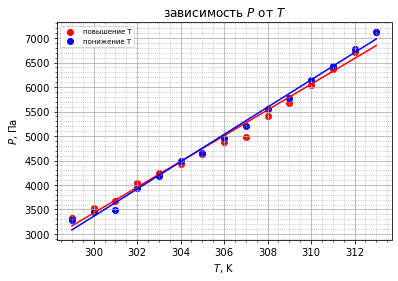

In [139]:
#def MNK (x, y, pl = None, lab = None, color = None):
#plt.errorbar(x, p[0],  label = 'повышение T', linestyle='none',  marker='o', c = 'b')
#plt.errorbar(x, p[1], label = 'понижение T', linestyle='none',  marker='o', c = 'g')

x = [x + 273 for x in t]
_, fig = plt.subplots()
k = []
k.append( MNK(x, p[0], fig, lab = 'повышение T', color = 'r'))
k.append( MNK(x, p[1], fig, lab = 'понижение T', color = 'b'))
fig.set_title("зависимость $P$ от $T$")
fig.set_ylabel("$P$, Па")
fig.set_xlabel("$T$, K")
fig.minorticks_on()
fig.grid(which='major')
fig.grid(which='minor', linestyle=':')
fig.legend(fontsize = 7)
plt.show()

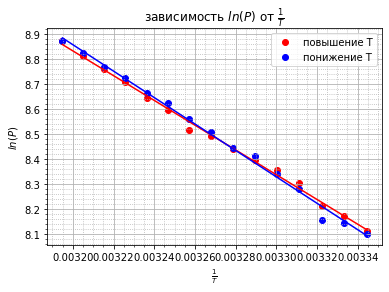

In [138]:
x = [1/(x + 273) for x in t]
_, fig = plt.subplots()
k1 = []
k1.append( MNK(x, [math.log(i) for i in p[0]], fig, lab = 'повышение T', color = 'r'))
k1.append( MNK(x, [math.log(i) for i in p[1]], fig, lab = 'понижение T', color = 'b'))
fig.set_title("зависимость $ln(P)$ от $\\frac{1}{T}$")
fig.set_ylabel("$ln(P)$")
fig.set_xlabel("$\\frac{1}{T}$")
fig.minorticks_on()
fig.grid(which='major')
fig.grid(which='minor', linestyle=':')
fig.legend(fontsize = 10)
plt.show()

In [135]:
for i in range(2):
    print(f'{(R*(310**2)/p[i][12])*k[i][0]/1000:.2f} {k[i][2]*(R*(310**2)/p[i][12])/1000:.2f}')

32.98 9.27
34.57 9.64


In [114]:
print(f" L_нагр = {(-k1[0][0]*R/1000)/18:.2f} ± {(k1[0][2]/1000)/18:.2f} Кдж/кг")
print(f" L_ост = {(-k1[1][0]*R/1000)/18:.2f} ± {(k1[1][2]/1000)/18:.2f} Кдж/кг")

 L_нагр = 2.29 ± 0.08 Кдж/кг
 L_ост = 2.45 ± 0.08 Кдж/кг


In [110]:
print(f" L_нагр = {-k1[0][0]*R/1000:.2f} ± {k1[0][2]/1000:.2f} Кдж/моль")
print(f" L_ост = {-k1[1][0]*R/1000:.2f} ± {k1[1][2]/1000:.2f} Кдж/моль")

 L_нагр = 41.28 ± 1.38 Кдж/моль
 L_ост = 44.07 ± 1.48 Кдж/моль


In [115]:
#return [k, b, math.sqrt(abs(dk_s)**2 + abs(qk)**2), abs(qb), abs(dk_s), abs(qk)]

In [137]:
for i in range(2):
    print(f'{k1[i][0]:.2f} {k1[i][1]:.2f} {k1[i][2]:.2f}')

-4965.41 24.72 1381.56
-5299.97 25.82 1477.27


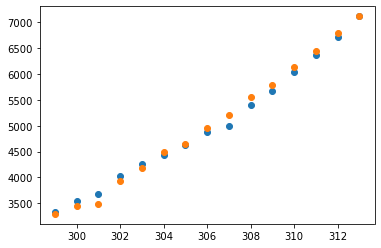

In [141]:
plt.scatter(x, p[0])
plt.scatter(x, p[1])

In [96]:
help(fx)

Help on function fx in module __main__:

fx(x, k, b)



# Лабораторная работа 2.2.6

In [3]:
def rpho_gl(t):
    '''
        плотность глицирина от температуры
    '''
    return round(fx(t, -0.0005, 1.27), 4)

# x = [20, 40]
# rpho = [1.26, 1.25]
# k = MNK(x, rpho)
# k = k[:2]
# k[0] = round(k[0], 4)
# k[1] = round(k[1], 2)
# print(k[0], k[1])
# plt.plot([15, 55], [fx(15, k[0], k[1]), fx(55, k[0], k[1])])

In [4]:
dd = 0.05
dt = 0.2
dl = 0.01
l = 20
rpho_m = 7.7
rpho_c = 2.6
t = 't'
d = 'd'
m = 'm'
c = 'c'
T = {
    24.95:{
        'm':[
            {'t':[29.06, 29.21],'d':0.8},
            {'t':[26.42, 26.65],'d':0.85}
        ],
        'c':[
            {'t':[25.27, 25.24],'d':1.95},
            {'t':[25.18, 25.74],'d':2.1}
        ]
    },
    30.90:{
        'm':[
            {'t':[22.23, 22.26],'d':0.8},
            {'t':[22.25, 22.23],'d':0.85}
        ],
        'c':[
            {'t':[17.33, 17.25],'d':2.05},
            {'t':[17.25, 17.42],'d':2.1}
        ]
    },
    35.6:{
        'm':[
            {'t':[15.12, 15.08],'d':0.85},
            {'t':[15.26, 15.19],'d':0.85}
        ],
        'c':[
            {'t':[10.89, 11.29],'d':2.05},
            {'t':[10.82, 11.19],'d':2.05}
        ]
    },
    40.80:{
        'm':[
            {'t':[19.66, 19.41],'d':0.6},
            {'t':[12.53, 12.75],'d':0.8}####
        ],
        'c':[
            {'t':[10.29, 10.22],'d':2.1},
            {'t':[9.52, 9.79],  'd':2.05}
        ]
    },
    45.60:{
        'm':[
            {'t':[13.80, 14.15],'d':0.6},
            {'t':[6.59, 6.29],  'd':0.85}
        ],
        'c':[
            {'t':[6.38, 6.65],  'd':2.1},
            {'t':[6.51, 6.50],  'd':2.15}
        ]
    },
    50.47:{
        'm':[
            {'t':[6.36, 6.85],  'd':0.8},
            {'t':[5.18, 5.26],  'd':0.85}
        ],
        'c':[
            {'t':[4.71, 4.85],  'd':2.1},
            {'t':[4.59, 4.74],  'd':2.1}
        ]
    }
}

In [5]:
sc = 0
sm = 0
n = 0
for i in T:
    for j in T[i]:
        for k in T[i][j]:
            if j == m:
                sm += k[d]
                n += 1
            if j == c:
                sc += k[d]
sc = round(sc/n, 2)
sm = round(sm/n, 2)
ssc = 0
ssm = 0
for i in T:
    for j in T[i]:
        for k in T[i][j]:
            if j == m:
                ssm += (k[d]-sm)**2
            if j == c:
                ssc += (k[d]-sc)**2
dc = math.sqrt(ssc/(n*(n-1))); dc = round(math.sqrt(dc**2+dd**2), 2)
dm = math.sqrt(ssm/(n*(n-1))); dm = round(math.sqrt(dm**2+dd**2), 2)

In [6]:
print (f'D_', '{металл}', f'= {sm} +- {dm} мм (\\varepsilon = {dm/sm*100:.1f}%)', sep = '')
print (f'D_', '{стекла}', f'= {sc} +- {dc} мм (\\varepsilon = {dc/sc*100:.1f}%)', sep = '')

D_{металл}= 0.79 +- 0.06 мм (\varepsilon = 7.6%)
D_{стекла}= 2.08 +- 0.05 мм (\varepsilon = 2.4%)


In [7]:
def v_c (a):
    #return ((l/2)/a['t'][0]+(l/2)/a['t'][1])/2
    #return (l/2)/a['t'][1]
    return l/(a['t'][0]+a['t'][1])
def wyas (t):
    data = T[t]
    rpho_j = rpho_gl(t)
    #rpho_j = 0.81
    for i in data:
        if i == 'm':
            #srr = sm/2
            
            rpho = rpho_m
            km = 0
            for j in range (2):
                srr = data[i][j]['d']/2
                km += (2/9)*g*100*((srr/10)**2)*((rpho-rpho_j)/(v_c(data[i][j])))*100 #Па * с
                #print(f'g = {g}, R = {srr}/10, rpho = {rpho}, rpho_j = {rpho_j}, V = {v_c(data[i][j])}, kf = {km}')
            km = km/2
            dkm = km * math.sqrt( (dl/(l/2))**2 + (dt/data[i][0]['t'][0])**2 + 4*(dd/srr)**2 )
        if i == 'c':
            #srr = sc/2
            rpho = rpho_c
            kfc= 0
            for j in range (2):
                srr = data[i][j]['d']/2
                kfc += (2/9)*g*100*((srr/10)**2)*((rpho-rpho_j)/(v_c(data[i][j])))*100 #Па * с
                #print(f'g = {g}, R = {srr}/10, rpho = {rpho}, rpho_j = {rpho_j}, V = {v_c(data[i][j])}, kf = {kfc}')
            kfc = kfc/2
            dkc = kfc * math.sqrt( (dl/(l/2))**2 + (dt/data[i][0]['t'][0])**2 + 4*(dd/srr)**2 )
    return ((round(km, 2), dkm), (round(kfc, 2), dkc))

In [8]:
wy = {}
for i in list(T.keys()):
    #print(i, wyas(i)[0], wyas(i)[1])
    print ('i = ', i, 'w =', wyas(i))
    wy[i+273] = wyas(i)

i =  24.95 w = ((663.7, 156.2324099577138), (761.81, 72.80698907392443))
i =  30.9 w = ((532.09, 125.29029630097124), (546.48, 52.429038915433836))
i =  35.6 w = ((384.83, 90.69191058730044), (340.91, 33.84583837471713))
i =  40.8 w = ((265.72, 66.48482587505185), (315.62, 31.39903069896223))
i =  45.6 w = ((170.22, 40.12859157647781), (216.69, 21.27180193018244))
i =  50.47 w = ((140.65, 33.38903658559228), (153.77, 16.03483634055189))


In [9]:
x = [1/(i+273) for i in T.keys()]
y1 = [math.log(wy[i][0][0]/1000) for i in wy]
y2 = [math.log(wy[i][1][0]/1000) for i in wy]

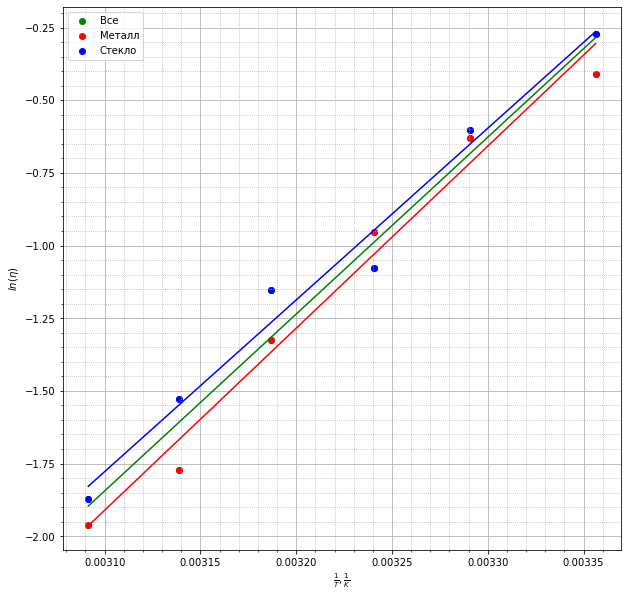

In [95]:
_, fig = plt.subplots(figsize=(10, 10))
k1 = []
k1.append( MNK(x*2, y1 + y2, fig, color = 'g', lab = 'Все'))
k1.append( MNK(x, y1, fig, color = 'r', lab = 'Металл'))
k1.append( MNK(x, y2, fig, color = 'b', lab = 'Стекло'))
# fig.figure(figsize=(10, 10))
fig.set_ylabel("$ln(\\eta)$")
fig.set_xlabel("$\\frac{1}{T}, \\frac{1}{K}$")
fig.minorticks_on()
fig.grid(which='major')
fig.grid(which='minor', linestyle=':')

fig.legend(fontsize = 10)
plt.savefig('saved_figure.png')
plt.show()

# Лаба 2.2.1

153.841
303.996
437.18
582.875
708.0


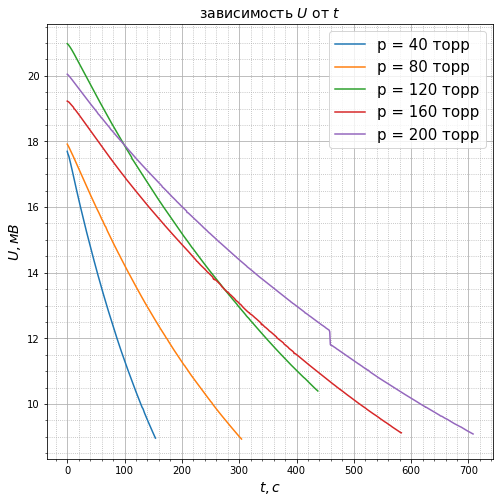

In [200]:
_, fig = plt.subplots(figsize = (8, 8))

for i in range(1, 6):
    t = {}
    with open('a'+str(i)+'.csv') as f:
        for j in f:
            a = list(map(float, j.split(',')))
            t[a[0]] = a[1]
    print (list(t.keys())[-1])
    x = list(t.keys())
    y = list(t.values())
    fig.plot(x, y, label = 'p = ' + str(p[i-1]) + ' торр')

fig.set_ylabel("$U, мВ$", fontsize=14)
fig.set_xlabel("$t, с$", fontsize=14)
fig.set_title("зависимость $U$ от $t$", fontsize=14)
fig.minorticks_on()
fig.grid(which='major')
fig.grid(which='minor', linestyle=':')
fig.legend(fontsize = 15)

153.841
303.996
437.18
582.875
708.0


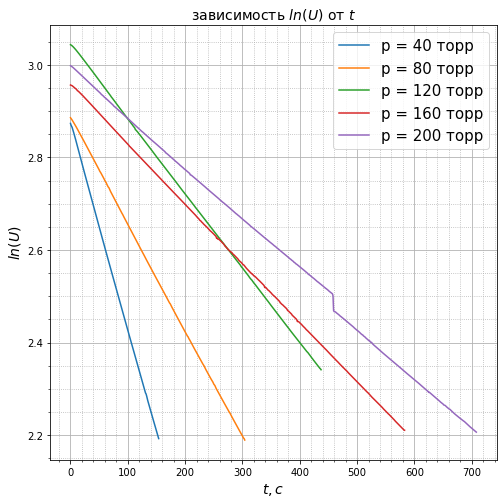

In [201]:
# u(t) = u_0 * exp(-t/T)
# ln (u) = ln (u_0) - t/T
# y = y_0 * EXP (-x/x_0)
# ln (y) = ln (y_0) - x * 1/x_0
_, fig = plt.subplots(figsize = (8, 8))



k = []
v = 410 #+- 10 см**3
l = 9 #+- 0.1 см**3
p = [40, 80, 120, 160, 200]
for i in range(1, 6):
    t = {}
    with open('a'+str(i)+'.csv') as f:
        for j in f:
            a = list(map(float, j.split(',')))
            t[a[0]] = a[1]
    print (list(t.keys())[-1])
    x = list(t.keys())
    y = [math.log(i) for i in t.values()]
    k.append(MNK(x, y))
    fig.plot(x, y, label = 'p = ' + str(p[i-1]) + ' торр')

fig.set_ylabel("$ln(U)$", fontsize=14)
fig.set_xlabel("$t, с$", fontsize=14)
fig.set_title("зависимость $ln(U)$ от $t$", fontsize=14)
fig.minorticks_on()
fig.grid(which='major')
fig.grid(which='minor', linestyle=':')
fig.legend(fontsize = 15)

In [212]:
for i, j in zip(k, p):
    print(f'{j} & {i[0]*10**3:.3f} & {i[2]*10**3:.2f} & {-i[0]**-1:.2f} & {(-i[0]**-1)*(i[2]/i[1]):.2f} \\\\ \hline')
#     print(f'p = {j}, B = {i[0]*10**3:.3f}, qB = {i[2]*10**3:.2f}, t = {-i[0]**-1:.2f}, qt = {(-i[0]**-1)*(i[2]/i[1]):.2f}')

40 & -4.462 & 0.36 & 224.13 & 0.03 \\ \hline
80 & -2.308 & 0.13 & 433.19 & 0.02 \\ \hline
120 & -1.615 & 0.08 & 619.02 & 0.02 \\ \hline
160 & -1.285 & 0.05 & 778.22 & 0.01 \\ \hline
200 & -1.126 & 0.04 & 887.73 & 0.01 \\ \hline


In [216]:
D = []
for i, j in zip(k, p):
    D.append(round(-i[0]*v*l/2, 2))
    #print(f'p = {j}, D = {round(-i[0]*v*l/2, 2)}')
    print(f'{j} & {round(-i[0]*v*l/2, 2)} & {(-i[0]*v*l/2)*math.sqrt((0.2/-i[0]**-1)**2 + (10/410)**2 + (0.1/9)**2):.2f} \\\\ \hline')

40 & 8.23 & 0.22 \\ \hline
80 & 4.26 & 0.11 \\ \hline
120 & 2.98 & 0.08 \\ \hline
160 & 2.37 & 0.06 \\ \hline
200 & 2.08 & 0.06 \\ \hline


25.0 & 8.23 \\ \hline
12.5 & 4.26 \\ \hline
8.33 & 2.98 \\ \hline
6.25 & 2.37 \\ \hline
5.0 & 2.08 \\ \hline


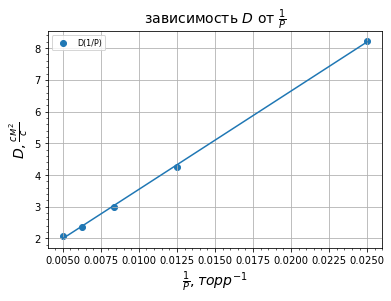

In [227]:
x = [1/i for i in p]
y = D

_, fig = plt.subplots()
kD = MNK(x, y, fig, 'D(1/P)')
fig.set_ylabel("$D, \\frac{см^2}{c}$", fontsize=14)
fig.set_xlabel("$\\frac{1}{P}, торр^{-1}$", fontsize=14)
fig.set_title("зависимость $D$ от $\\frac{1}{P}$", fontsize=14)
fig.minorticks_on()
fig.grid(which='major')
fig.legend(fontsize = 8)

for i in zip(x, y):
    print (round(i[0]*1000, 2),'&',  i[1], '\\\\ \hline')

In [229]:
print (f'k = {kD[0]:.2f} +- {19.14} {100*19.14/kD[0]:.2f}')
print (f'b = {kD[1]:.2f} +- {kD[3]:.2f} {0.02/0.44*100}')

k = 310.30 +- 19.14 6.17
b = 0.44 +- 0.02 4.545454545454546


In [206]:
# D = k * 1/p + b
D_a = kD[0]*(1/760) + kD[1]
print (f'D_атм {kD[0]*(1/760) + kD[1]:.2f}, {(kD[0]*(1/760) + kD[1])*((kD[2]/kD[0])/760 + kD[3]/kD[1]):.2f}')

D_атм 0.85, 0.05


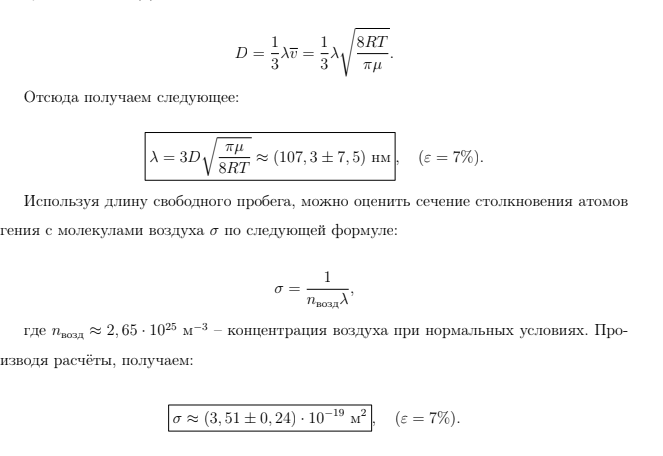

In [207]:
print('lyam', round(3*D_a*math.sqrt((math.pi*28.97)/(8*R*295))*1000, 2), round(round(3*D_a*math.sqrt((math.pi*28.97)/(8*R*295))*1000, 2)*0.05/0.85, 2))

lyam 173.61 10.21


In [208]:
print('q', round(1/(2.65*(3*D_a*math.sqrt((math.pi*28.97)/(8*R*295))*1000))*1000, 2), round(round(1/(2.65*(3*D_a*math.sqrt((math.pi*28.97)/(8*R*295))*1000))*1000, 2)*10.2/173.6, 2))

q 2.17 0.13


# Лаба 2.1.3

In [17]:
l = 23.3
o2 = {
    3.333:[
        0.6,
        5.6, 
        11.1,
        16.3,
        21.4
    ],
    4.520:[
        1.1,
        5,
        8.5,
        12.8,
        16.5,
        20.5
    ],
    2.149:[
        1,
        8.9,
        17.2
    ],
    2.6520:[
        2.6,
        9.3,
        15.8,
        22.4
    ],
    3.929:[
        5.2,
        9.5,
        14.1,
        18.5,
        22.9
    ]
}
co2 = {
    2.656:[17.3,
           10.8,
           4.8
    ],
    3.298:[
        21.6,
        16.6,
        11.2,
        6.2,
        1.2
    ],
    4.526:[
        18.9,
        15.7,
        11.8,
        8.2,
        4.6
    ],
    1.79:[
        16.7,
        10.6,
        2.2
    ],
    2.986:[
        22.1,
        16.9,
        11.8,
        6.8,
        1.6
    ]
}

In [125]:
def obr(data, m):
    data = {d:[l - i for i in data[d]] for d in data}
    _, fig = plt.subplots(figsize = (8, 8))
    print(f"{'f, гц':6} {'a, мм':6} {'da, мм':6} {'ly, мм':6} {'dly,мм':6} {'c, м/с':6} {'dc,м/с':6}")
    c_sr = 0
    for i, p in zip(data.values(), data.keys()):
        mas = sorted(i)
        k = []
        k.append(mas[0])
        for j in range(len(mas)-1):
            k.append(mas[j+1]-mas[j])
        k.append(0)
        k.sort()
        mas = sorted([(k-mas[0])*10 for k in mas])
        a = MNK_direct(list(range(0, len(i))), mas, fig, lab='$f =$ '+str(int(p*1000))+' Гц')
        print (f'{int(p*1000):6} {a[0]:6.1f} {(a[1]**2 + 0.05**2)**0.5:6.1f} {a[0]*2:6.1f} {(a[1]**2 + 0.05**2)**0.5*2:6.1f} {a[0]*2*p:6.1f} {(a[0]*2*p)*(((a[1]**2 + 0.05**2)**0.5*2)/(a[0]*2)**2 + (0.001/p)**2)**0.5:6.1f}')                                           
        c_sr += a[0]*2*p
    c_sr /= len(data.keys())
    print('-'*55)
    print(f'c_ср = {c_sr:.1f}')
    fig.set_ylabel("$L, мм$", fontsize=14)
    fig.set_xlabel("$k$", fontsize=14)
    fig.minorticks_on()
    fig.grid(which='major')
    fig.legend(fontsize = 13)
    plt.show()

f, гц  a, мм  da, мм ly, мм dly,мм c, м/с dc,м/с
  3333   52.1    0.2  104.2    0.4  347.3    2.1
  4520   39.0    0.2   78.0    0.4  352.4    2.9
  2149   81.4    0.5  162.8    0.9  349.9    2.1
  2652   65.9    0.1  131.7    0.2  349.3    1.3
  3929   44.3    0.1   88.7    0.2  348.4    1.9
-------------------------------------------------------
c_ср = 349.4


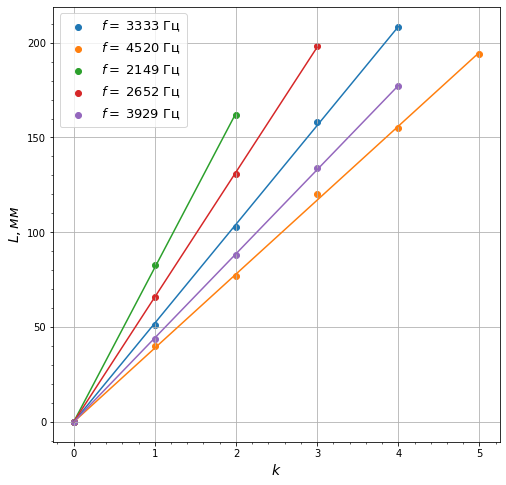

In [126]:
obr(o2, 4)